In [739]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 150) 
pd.set_option('display.max_rows', 300)

In [740]:
df_subvencions = pd.read_csv('../data/Subvencions_atorgades_AjuntBCN_i_Instituts.csv')

In [741]:
df_subvencions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61696 entries, 0 to 61695
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entitat_Municipal        61696 non-null  object 
 1   Organ_Gestor             54915 non-null  object 
 2   Beneficiari              61696 non-null  object 
 3   NIF_CIF                  61696 non-null  object 
 4   Tipologia_De_Subvencio   61132 non-null  object 
 5   Codi_De_Subvencio        61696 non-null  object 
 6   Objecte                  61696 non-null  object 
 7   Data_Convocatoria        61696 non-null  object 
 8   Data_Atorgament          61696 non-null  object 
 9   Import_Sollicitat        61696 non-null  float64
 10  Import_Total_Projecte    61696 non-null  float64
 11  Import_Atorgat_Inicial   61696 non-null  float64
 12  Import_Reintegrat_Total  61696 non-null  float64
dtypes: float64(4), object(9)
memory usage: 6.1+ MB


In [742]:
print(df_subvencions.shape)
df_subvencions.head(2)

(61696, 13)


,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
0,Ajuntament de Barcelona,"Gerència Drets de Ciutadania, Participació i T...",ASSOCIACIO UCRAINESA DJERELO,G65874968,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...,19S00465,V Ucrania Fest,24.01.2019,16.09.2019,5000.0,14900.0,4500.0,0.0
1,Ajuntament de Barcelona,Gerència de Drets Socials,PROJECTE DELS NOMS - HISPANOSIDA,G60396280,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. GERÈ...,19S00469,26è Memorial Internacional de la Sida,24.01.2019,12.09.2019,4000.0,13000.0,3000.0,0.0


In [743]:
df_subvencions.describe().T

,count,mean,std,min,25%,50%,75%,max
Import_Sollicitat,61696.0,32622.580025,1.188566e+06,0.0,1000.0,3200.000,9000.0,1.620830e+08
Import_Total_Projecte,61696.0,37172.735972,6.939191e+05,0.0,1500.0,6412.705,20000.0,1.506817e+08
Import_Atorgat_Inicial,61696.0,117470.655703,2.112606e+06,-4700000.0,1000.0,2250.000,6000.0,1.607830e+08
Import_Reintegrat_Total,61696.0,106.704832,5.104336e+03,0.0,0.0,0.000,0.0,1.185303e+06


In [744]:
df_subvencions.describe(include=object).T

,count,unique,top,freq
Entitat_Municipal,61696,12,Ajuntament de Barcelona,46213
Organ_Gestor,54915,48,"Gerència d’Àrea d’Economia, Recursos i Promoci...",9349
Beneficiari,61696,25247,INST. MPAL. CULTURA (ICUB),220
NIF_CIF,61696,18885,P5890006I,225
Tipologia_De_Subvencio,61132,260,AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...,5795
Codi_De_Subvencio,61696,49175,23S00061,7
Objecte,61696,34016,POCS RECURSOS 2019,5795
Data_Convocatoria,61696,112,00.00.0000,27889
Data_Atorgament,61696,1339,17.12.2019,5821


### Checki duplicates

In [745]:
df_subvencions[df_subvencions.duplicated(keep=False)]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total


In [746]:
df_subvencions.isnull().sum()

Entitat_Municipal             0
Organ_Gestor               6781
Beneficiari                   0
NIF_CIF                       0
Tipologia_De_Subvencio      564
Codi_De_Subvencio             0
Objecte                       0
Data_Convocatoria             0
Data_Atorgament               0
Import_Sollicitat             0
Import_Total_Projecte         0
Import_Atorgat_Inicial        0
Import_Reintegrat_Total       0
dtype: int64

### Check the nulls

In [747]:
df_subvencions[df_subvencions['Organ_Gestor'].isnull()]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
640,Institut Municipal d'Educació,NaN,NATALIA ANGLES I BERNAL,48023217E,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00158,BECA FP DUAL NATALIA ANGLES I BERNAL 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2521.13,0.0
641,Institut Municipal d'Educació,NaN,BERTA ARIAS RUESGA,49292612R,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00159,BECA FP DUAL BERTA ARIAS RUESGA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2499.44,0.0
642,Institut Municipal d'Educació,NaN,DEIDRE ATIENZAR CEBRIA,26068801A,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00160,BECA FP DUAL DEIDRE ATIENZAR CEBRIA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,1161.02,0.0
643,Institut Municipal d'Educació,NaN,ARIADNA BIETO I ESTRELLA,23922664L,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00161,BECA FP DUAL ARIADNA BIETO ESTRELLA 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,1286.21,0.0
644,Institut Municipal d'Educació,NaN,CABRERA CORONADO,26910572C,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00162,BECA FP DUAL SHEYLA CABRERA CORONADO 2020-2021,00.00.0000,20.11.2020,2521.13,2521.13,2480.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61691,Institut Municipal Barcelona Esports,NaN,CLUB NATACION BARCELONA,G08533689,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00988,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,25000.00,25000.00,25000.00,0.0
61692,Institut Municipal Barcelona Esports,NaN,REAL CLUB DE TENIS BARCELONA-1899,G08555278,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00989,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,25000.00,25000.00,25000.00,0.0
61693,Institut Municipal Barcelona Esports,NaN,Unió Esportiva d'Horta,G08675738,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00991,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,18993.41,18993.41,18993.41,0.0
61694,Institut Municipal Barcelona Esports,NaN,Fed Esp Cat Paralítics Cerebrals,G60121043,SUBVENCIONS DIRECTES (amb o sense CONVENI),21S00311,Conveni DIBA 2020 - Esdeveniments,00.00.0000,06.05.2021,5000.00,5000.00,5000.00,0.0


### Evaluo reemplazar los nulos por "no_gestor" para ver su comportamiento 

In [748]:
df = df_subvencions.copy()

In [749]:
df['Organ_Gestor'].fillna('no_gestor', inplace=True)

C:\Users\harol\AppData\Local\Temp\ipykernel_10768\741646457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Organ_Gestor'].fillna('no_gestor', inplace=True)


In [750]:
df.groupby(['Entitat_Municipal','Organ_Gestor'])['Organ_Gestor'].count()

Entitat_Municipal                                           Organ_Gestor                                                         
Ajuntament de Barcelona                                     Districte d'Horta-Guinardó                                               1559
                                                            Districte de Ciutat Vella                                                1602
                                                            Districte de Gràcia                                                      1131
                                                            Districte de Nou Barris                                                  1300
                                                            Districte de Sant Andreu                                                 1328
                                                            Districte de Sant Martí                                                  1477
                                          

### después de observar a detalle la distribuciób observo que los "no gestor" son parte de la misma entidad municipal, así que cambiaré los nulos por la misma entidad, excepto en la municipalidad de Barcelona

In [751]:
df_subvencions['Organ_Gestor'] = df_subvencions['Organ_Gestor'].fillna(df_subvencions['Entitat_Municipal'])

In [752]:
df_subvencions.groupby(['Entitat_Municipal','Organ_Gestor'])['Organ_Gestor'].count()

Entitat_Municipal                                           Organ_Gestor                                                         
Ajuntament de Barcelona                                     Ajuntament de Barcelona                                                   215
                                                            Districte d'Horta-Guinardó                                               1559
                                                            Districte de Ciutat Vella                                                1602
                                                            Districte de Gràcia                                                      1131
                                                            Districte de Nou Barris                                                  1300
                                                            Districte de Sant Andreu                                                 1328
                                          

### Tipología de subvención

In [753]:
df_subvencions['Tipologia_De_Subvencio'].value_counts(normalize=True)

Tipologia_De_Subvencio
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS     0.094795
AJUTS                                                               0.089658
SUBVENCIONS DIRECTES (amb o sense CONVENI)                          0.082952
PROJ. INVERS. ESTABLIMENTS ECON. LOCAL CONCURRÈNCIA NO COMPETITI    0.045017
TRANSFERÈNCIES ENS PÚBLICS I ALTRES                                 0.042580
SUBVENCIONS CONVOCATÒRIA                                            0.017569
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2020. GERÈNCIA DRETS SOCIALS    0.011189
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2024. ICUB                      0.011058
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2021. ICUB                      0.010715
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS DE CIUTADANIA i P    0.010682
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2023. ICUB                      0.010567
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2021. GERÈNCIA DRETS SOCIALS    0.010567
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2022. GERÈNCIA DR

In [754]:
df_subvencions[df_subvencions['Tipologia_De_Subvencio'].isnull()]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
18782,Ajuntament de Barcelona,Districte de Ciutat Vella,ASS CULTURAL I SOCIAL L'EM I JPC,G64031958,NaN,21S04964,Conveni col·laboració Projecte Ens Raval'EM,00.00.0000,21.10.2021,49630.0,50000.0,49630.0,0.0
18815,Ajuntament de Barcelona,"Gerència d’Àrea de Cultura, Educació, Ciència ...",ASOC EXPANSION DE LA XARXA OBERTA,G65319832,NaN,21S05362,Conveni eXO.cat Xarxa Oberta inclusió digital,00.00.0000,28.06.2021,15075.4,15075.4,15075.4,0.0
18845,Ajuntament de Barcelona,"Gerència d’Àrea d’Economia, Recursos i Promoci...",ASSOCIACIÓ CAMBRA LGTBIQ CATALUNYA,G64717812,NaN,21S05178,Promoció i dinamització BCN LGTBIQ (ACEGAL),00.00.0000,09.09.2021,66905.0,245735.0,116905.0,0.0
18846,Ajuntament de Barcelona,"Gerència d'Area de Drets Socials, Justícia Glo...",ASSOCIACIO SETEM CATALUNYA,G59523910,NaN,21S05179,Conveni Setem 2021,00.00.0000,08.07.2021,65000.0,130000.0,65000.0,0.0
18882,Ajuntament de Barcelona,"Gerència d'Area de Drets Socials, Justícia Glo...",ASSOC. CA LA DONA,G58505280,NaN,21S05210,Conveni Ca la Dona 2021,00.00.0000,01.07.2021,31050.0,34500.0,31050.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59845,Ajuntament de Barcelona,Districte de Gràcia,CERCLE DE GRÀCIA,G08534984,NaN,21S13098,Promoció Activitats Culturals Cercle Catòlic,00.00.0000,27.12.2021,13000.0,0.0,13000.0,0.0
60744,Ajuntament de Barcelona,"Gerència d’Àrea d’Economia, Recursos i Promoci...",FUNDACIÓN SHIP2B,G66220286,NaN,22S08583,IX Ship2B Impact Forum,00.00.0000,29.09.2022,50000.0,404722.9,50000.0,0.0
60788,Ajuntament de Barcelona,"Gerència d'Area de Drets Socials, Justícia Glo...",PALLASSOS SENSE FRONTERES,G60343951,NaN,22S09646,PSF -Suport a infància refugiada i vulnerable ...,00.00.0000,27.12.2022,29900.0,55645.0,29900.0,0.0
60789,Ajuntament de Barcelona,"Gerència d'Area de Drets Socials, Justícia Glo...",FUNDACIO BARCELONACTUA,G66571746,NaN,22S09648,Conveni BCN Actua 2022,00.00.0000,22.12.2022,150000.0,187500.0,150000.0,0.0


In [755]:
df_subvencions['Tipologia_De_Subvencio'].fillna('no_tipo', inplace=True)

C:\Users\harol\AppData\Local\Temp\ipykernel_10768\4190768758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subvencions['Tipologia_De_Subvencio'].fillna('no_tipo', inplace=True)


In [756]:
tipo_subvencion_acumulado = df_subvencions['Tipologia_De_Subvencio'].value_counts(normalize=True).to_frame()

In [757]:
tipo_subvencion_acumulado['acumulado'] = tipo_subvencion_acumulado.cumsum()

In [758]:
tipo_subvencion_acumulado

,proportion,acumulado
Tipologia_De_Subvencio,,
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS,0.093928,0.093928
AJUTS,0.088839,0.182767
SUBVENCIONS DIRECTES (amb o sense CONVENI),0.082193,0.264960
PROJ. INVERS. ESTABLIMENTS ECON. LOCAL CONCURRÈNCIA NO COMPETITI,0.044606,0.309566
TRANSFERÈNCIES ENS PÚBLICS I ALTRES,0.042191,0.351757
SUBVENCIONS CONVOCATÒRIA,0.017408,0.369165
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2020. GERÈNCIA DRETS SOCIALS,0.011087,0.380252
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2024. ICUB,0.010957,0.391209
CONVOCATÒRIA GENERAL DE SUBVENCIONS 2021. ICUB,0.010617,0.401825


In [759]:
l_object = list(df_subvencions.describe(include=object).columns) # variables categóricas
l_number = list(df_subvencions.describe().columns) # variables numericas

In [760]:
l_object

['Entitat_Municipal',
 'Organ_Gestor',
 'Beneficiari',
 'NIF_CIF',
 'Tipologia_De_Subvencio',
 'Codi_De_Subvencio',
 'Objecte',
 'Data_Convocatoria',
 'Data_Atorgament']

### Entidad Municipal

In [761]:
df_subvencions['Entitat_Municipal'].value_counts()

Entitat_Municipal
Ajuntament de Barcelona                                       46213
Institut de Cultura de Barcelona                               6476
Institut Municipal Barcelona Esports                           3599
Institut Barcelona Esports                                     1201
Institut Municipal de persones amb Discapacitat                1060
Institut Municipal de Serveis Socials                           984
Institut Municipal d'Educació                                   603
Institut Municipal de Persones amb Discapacitat                 510
Institut Municipal del Paisatge Urbà i la Qualitat de Vida      386
Institut Municipal de Mercats de Barcelona                      292
Institut Municipal d' Hisenda                                   236
Institut Municipal d'Educació de Barcelona                      136
Name: count, dtype: int64

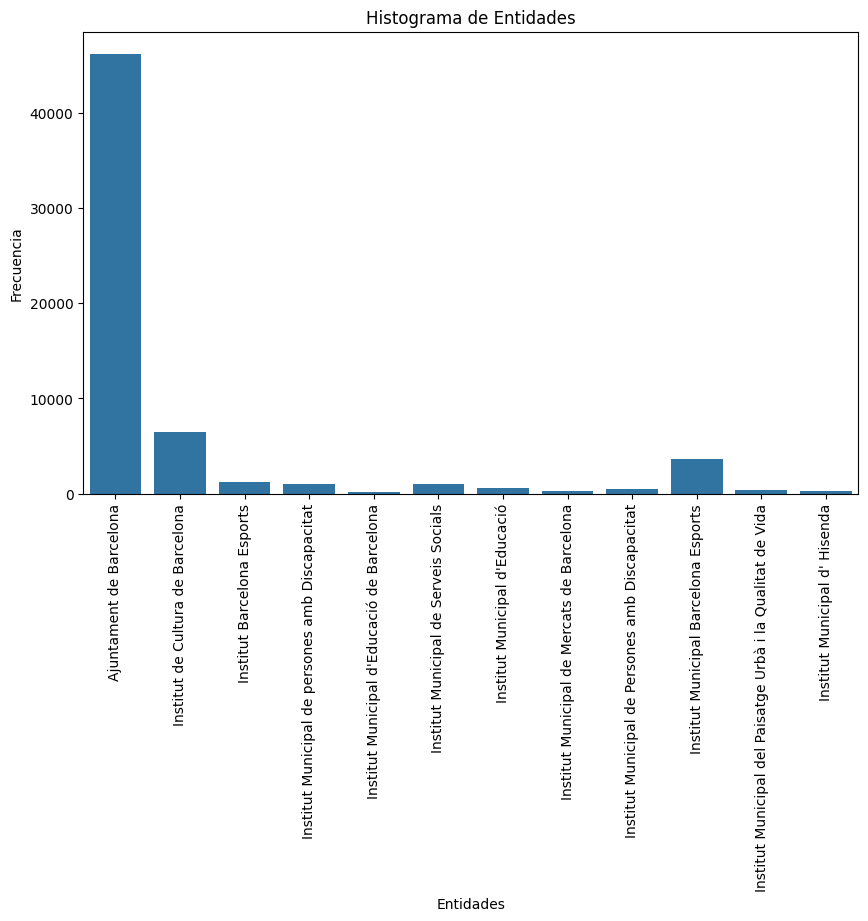

In [762]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Entitat_Municipal', data=df_subvencions)
plt.xticks(rotation=90)
plt.title('Histograma de Entidades')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()

### Beneficiario

In [763]:
df_subvencions['Beneficiari'].nunique()

25247

In [764]:
df = df_subvencions.groupby(['Beneficiari'])['Codi_De_Subvencio'].count().to_frame()

In [765]:
print(df.max())
print(df.min())

Codi_De_Subvencio    220
dtype: int64
Codi_De_Subvencio    1
dtype: int64


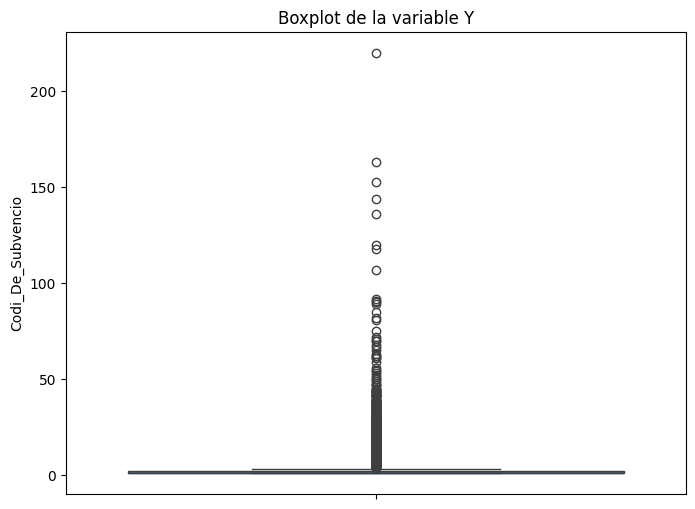

In [766]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Codi_De_Subvencio') 
plt.title('Boxplot de la variable Y')
plt.show()

### CODIGO DE IDENTIFICACION

In [767]:
l_object

['Entitat_Municipal',
 'Organ_Gestor',
 'Beneficiari',
 'NIF_CIF',
 'Tipologia_De_Subvencio',
 'Codi_De_Subvencio',
 'Objecte',
 'Data_Convocatoria',
 'Data_Atorgament']

In [768]:
df_subvencions['NIF_CIF'].nunique()

18885

In [769]:
df_subvencions.groupby(['NIF_CIF'])['Codi_De_Subvencio'].count()

NIF_CIF
0000000005     4
0000000080    70
0000000081    39
0000000088    21
0000000098     6
              ..
Z0414043W      1
Z0701759B      1
Z0809915K      1
Z1053103F      1
ZK3530580     38
Name: Codi_De_Subvencio, Length: 18885, dtype: int64

In [770]:
df = df_subvencions.groupby(['NIF_CIF'])['Codi_De_Subvencio'].count().to_frame()

In [771]:
print(df['Codi_De_Subvencio'].min())
print(df['Codi_De_Subvencio'].max())

1
225


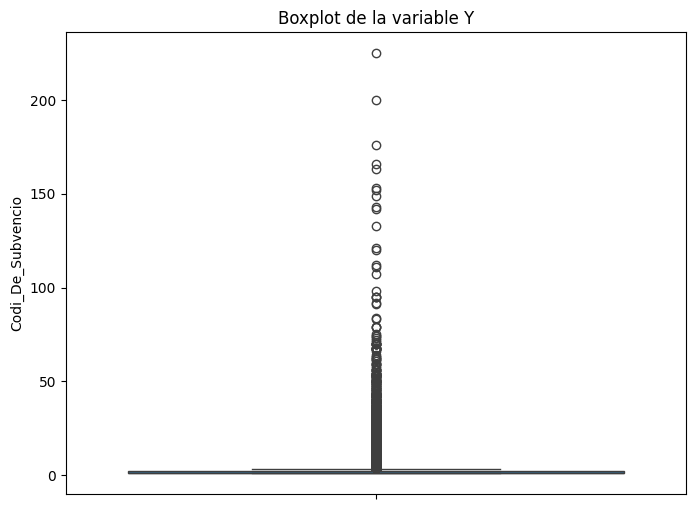

In [772]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Codi_De_Subvencio') 
plt.title('Boxplot de la variable Y')
plt.show()

### Codigo de subvención

In [773]:
df_subvencions['Codi_De_Subvencio'].nunique()

49175

In [774]:
list_codigo_subvencion = list(df_subvencions['Codi_De_Subvencio'].unique())

In [775]:
codigos_no_comunes_de_subvencion = []
for i in list_codigo_subvencion:
    if len(i)>8:
        codigos_no_comunes_de_subvencion.append(i)
    

In [776]:
len(codigos_no_comunes_de_subvencion )

619

In [777]:
df_subvencions[df_subvencions['Codi_De_Subvencio'].str.len() > 8]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
2979,Institut Municipal del Paisatge Urbà i la Qual...,Institut Municipal del Paisatge Urbà i la Qual...,MONTSERRAT VAZQUEZ RUIZ,43514719F,SUBVENCIONS NO TELEMÀTIQUES,20212100003170,N.Expedient 2020-0003A Campanya 01PU,00.00.0000,20.12.2021,8996.22,8996.22,8996.22,0.0
2980,Institut Municipal del Paisatge Urbà i la Qual...,Institut Municipal del Paisatge Urbà i la Qual...,ESTATGES CASADESUS S.L.,B61209409,SUBVENCIONS NO TELEMÀTIQUES,20222200002438,"Exp. 2020-0000A. La Rambla, 123",00.00.0000,03.08.2022,27614.22,27614.22,27614.22,0.0
2981,Institut Municipal del Paisatge Urbà i la Qual...,Institut Municipal del Paisatge Urbà i la Qual...,C PROP CL BISBE LAGUARDA 7 DE BCN,H58719063,SUBVENCIONS NO TELEMÀTIQUES,20222200002440,"Exp. 2020-0002A. C.Bisbe la Guarda, 7",00.00.0000,03.08.2022,7540.76,7540.76,7540.76,0.0
3072,Institut Municipal d' Hisenda,Institut Municipal d' Hisenda,AIDA CANDELAS ESPINAR,71359857B,SUBVENCIONS NO TELEMÀTIQUES,20212200000103,FORMACIO DUAL,00.00.0000,01.10.2021,2058.67,2058.67,2058.67,0.0
3216,Institut Municipal del Paisatge Urbà i la Qual...,Institut Municipal del Paisatge Urbà i la Qual...,CLAVE DENIA SA,A03740966,SUBVENCIONS NO TELEMÀTIQUES,20191900001341,N.Expedient 2015-0625A Campanya 2015,00.00.0000,26.04.2019,4011.77,4011.77,4011.77,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56502,Institut Municipal d' Hisenda,Institut Municipal d' Hisenda,ANYER MORENO ALCARAZ,24414313C,SUBVENCIONS NO TELEMÀTIQUES,20242400002657,ESTUDIANT EN PRÀCTIQUES,00.00.0000,07.06.2024,3350.00,3350.00,3350.00,0.0
60040,Institut Municipal del Paisatge Urbà i la Qual...,Institut Municipal del Paisatge Urbà i la Qual...,C.P. PL DEL PADRÓ 8-10,H62160981,SUBVENCIONS NO TELEMÀTIQUES,20242400000629,pagament subvenció 2022-0047A,00.00.0000,29.05.2024,28281.07,28281.07,28281.07,0.0
60041,Institut Municipal del Paisatge Urbà i la Qual...,Institut Municipal del Paisatge Urbà i la Qual...,"CDAD DE PROP DE LA CL CARMEN,76",H59072298,SUBVENCIONS NO TELEMÀTIQUES,20242400000625,pagament subvenció 2021-0343A,00.00.0000,29.05.2024,20236.43,20236.43,20236.43,0.0
60548,Institut Municipal del Paisatge Urbà i la Qual...,Institut Municipal del Paisatge Urbà i la Qual...,CDAD PROPIETARIS SAGRISTANS 3,H59985564,SUBVENCIONS NO TELEMÀTIQUES,00002400001655,2023-0045A. C/ SAGRISTANS 3,00.00.0000,00.00.0000,13366.04,13366.04,13366.04,0.0


In [778]:
df_subvencions[df_subvencions['Codi_De_Subvencio']=='23S00061']

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
25742,Ajuntament de Barcelona,Gerència de Pressupostos i Hisenda,AREA METROPOLITANA DE BARCELONA,P0800258F,TRANSFERÈNCIES ENS PÚBLICS I ALTRES,23S00061,AMB. Cess. Tributs i F. Complement Finançam 2023,00.00.0000,17.01.2023,0.0,0.0,1.006715e+08,0.0
42837,Institut Municipal d'Educació,Institut Municipal d'Educació,NEREA NOYA CAMBEIRO,47123219Z,SUBVENCIONS DIRECTES (amb o sense CONVENI),23S00061,BECA FP DUAL NEREA NOYA CAMBEIRO 23-24,00.00.0000,08.08.2023,4617.0,4617.0,4.617000e+03,0.0
44949,Institut Municipal de Serveis Socials,Institut Municipal de serveis Socials,ASSOC. CEDRE PER LA PROMOCIO SOCIAL,G62397476,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2023. IMSS,23S00061,Xarxa de Joves de Barcelona-recurs dacollida,00.00.0000,22.09.2023,15000.0,32000.0,1.200000e+04,0.0
50074,Institut Barcelona Esports,Institut Barcelona Esports,Associació de Lleure i Esport COMKE,G63419451,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2023. IBE,23S00061,"Equip i escola bàsquet, hoquei, eslàlom, SAFE",00.00.0000,28.12.2023,11000.0,22000.0,5.000000e+03,0.0
50656,Institut de Cultura de Barcelona,Institut de Cultura de Barcelona,ASSOC. FESTIVAL DE CREACIO CONTEM P,G65379919,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2023. ICUB,23S00061,Projecte d'art i territori,00.00.0000,24.11.2023,6100.0,16200.0,2.500000e+03,0.0
52271,Institut Municipal de persones amb Discapacitat,Institut Municipal de Persones amb Discapacitat,"Fundació Friends, Fundació Privada",G63728380,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2023. IMPD,23S00061,RESPIR FRIENDS,00.00.0000,13.12.2023,8000.0,34100.0,5.000000e+03,0.0
54661,Institut Municipal de Mercats de Barcelona,Institut Municipal de Mercats de Barcelona,Federació assoc mercats mpals FEMM,G02631513,SUBVENCIONS DIRECTES (amb o sense CONVENI),23S00061,ADDENDA - Subvenció FEMM 2023,00.00.0000,31.12.2023,60000.0,60000.0,6.000000e+04,0.0


### Objeto

In [779]:
df_subvencions['Objecte'].nunique()

34016

In [780]:
df_subvencions['Objecte'].value_counts()

Objecte
POCS RECURSOS 2019                                      5795
SUBVENCIÓ REACTIVACIÓ ESTABLIMENTS ECONOMIA LOCAL       2750
Ajut del programa Atenció a la dona víctima de viol.    2364
Ajut del programa Promoció i participació infància      1564
Ajut del programa                                       1145
                                                        ... 
Áurea Verd                                                 1
Sistemes Autoregeneratius Setmana de l'Arquit              1
Scape Room: Aprenem la importància dels ODS                1
Un planeta verd, un Picasso verd                           1
XII Premi Dona i Esport - Maria Angela Escudero            1
Name: count, Length: 34016, dtype: int64

### Datos de convocatoria

In [781]:
print(df_subvencions['Data_Convocatoria'].nunique())
df_subvencions['Data_Convocatoria'].unique()

112


array(['24.01.2019', '01.06.2021', '10.06.2022', '22.06.2022',
       '24.11.2019', '12.05.2019', '01.07.2019', '25.06.2019',
       '11.07.2019', '04.07.2019', '07.02.2020', '17.03.2020',
       '02.06.2020', '01.04.2019', '05.07.2019', '20.06.2019',
       '28.10.2019', '20.11.2019', '08.11.2019', '31.12.2019',
       '20.01.2020', '00.00.0000', '22.07.2020', '26.06.2020',
       '03.07.2020', '02.07.2020', '12.08.2020', '09.08.2022',
       '01.06.2022', '17.05.2022', '03.08.2022', '01.09.2020',
       '28.08.2020', '23.03.2022', '03.05.2022', '04.04.2022',
       '02.08.2022', '25.01.2018', '20.07.2021', '04.02.2019',
       '27.11.2017', '05.01.2018', '05.02.2018', '15.01.2019',
       '14.12.2018', '20.05.2019', '17.04.2019', '14.05.2019',
       '29.04.2019', '23.05.2019', '05.06.2019', '30.12.2021',
       '12.06.2019', '30.12.2020', '09.07.2020', '04.08.2020',
       '18.02.2021', '31.03.2021', '26.03.2021', '09.04.2021',
       '06.04.2021', '23.07.2020', '26.11.2020', '15.06

In [782]:
print(df_subvencions['Data_Atorgament'].nunique())
df_subvencions['Data_Atorgament'].unique()

1339


array(['16.09.2019', '12.09.2019', '04.10.2019', ..., '04.09.2024',
       '12.07.2024', '14.08.2019'], dtype=object)

### Importe otorgado inicial

In [783]:
## Eliminamos menores que 0
print(len(df_subvencions[df_subvencions['Import_Atorgat_Inicial']<0])) 
df_subvencions.drop(df_subvencions[df_subvencions['Import_Atorgat_Inicial']<0].index, inplace=True)

35


In [784]:
df_subvencions[df_subvencions['Import_Atorgat_Inicial']<0]

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total


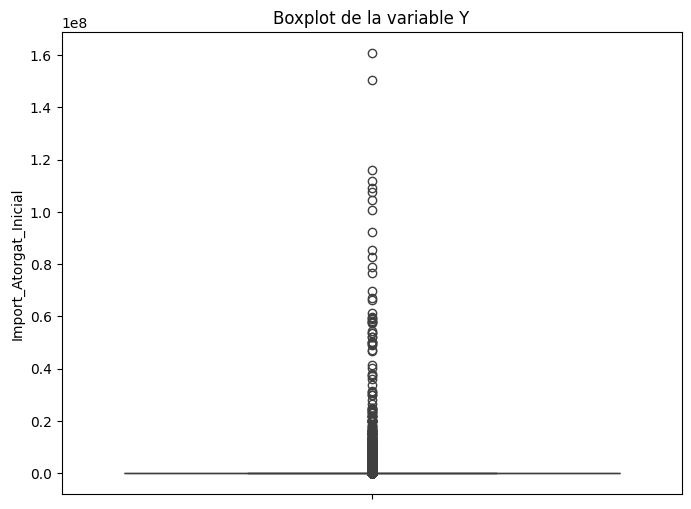

In [785]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subvencions, y='Import_Atorgat_Inicial') 
plt.title('Boxplot de la variable Y')
plt.show()

In [786]:
print(len(df_subvencions[df_subvencions['Import_Atorgat_Inicial']>50000]))
df = df_subvencions[df_subvencions['Import_Atorgat_Inicial']<=50000]

3626


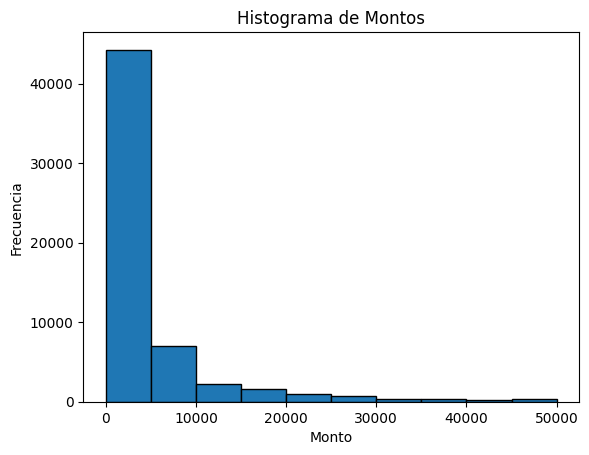

In [787]:
plt.hist(data=df, x='Import_Atorgat_Inicial',bins=10, edgecolor='black')

# Personalizar el histograma
plt.title('Histograma de Montos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Importe solicitado

In [788]:
df_subvencions['Import_Sollicitat'].value_counts(normalize=True)

Import_Sollicitat
0.00         0.139813
1000.00      0.044453
3000.00      0.036409
1500.00      0.033652
6000.00      0.029143
               ...   
7281.00      0.000016
275.99       0.000016
2302.96      0.000016
120100.00    0.000016
481228.14    0.000016
Name: proportion, Length: 13165, dtype: float64

In [789]:
len(df_subvencions[df_subvencions['Import_Sollicitat']<=0])

8621

In [790]:
len(df_subvencions[df_subvencions['Import_Sollicitat']<1])

8622

In [791]:
df_import_solicitado_diferente_cero = df_subvencions[~(df_subvencions['Import_Sollicitat']<1)] # para graficar

In [792]:
print(df_import_solicitado_diferente_cero['Import_Sollicitat'].min())
print(df_import_solicitado_diferente_cero['Import_Sollicitat'].max())

1.0
162082995.0


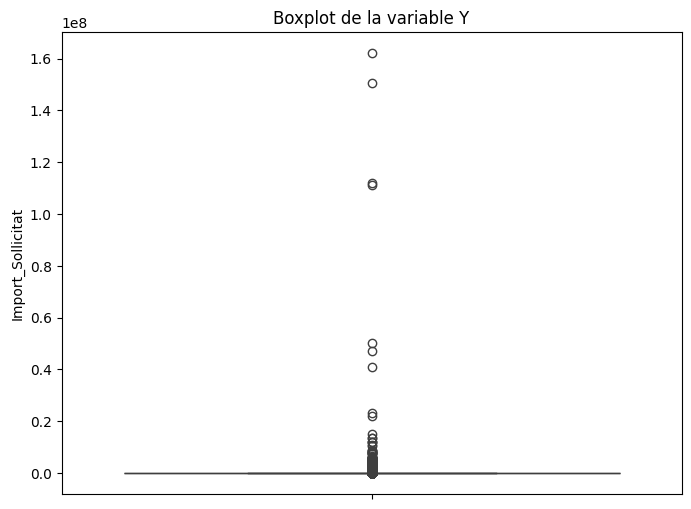

In [793]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_import_solicitado_diferente_cero, y='Import_Sollicitat') 
plt.title('Boxplot de la variable Y')
plt.show()

In [794]:
print(len(df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']>50000]))
print(len(df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']<=50000]))
df = df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']<50000]

2541
50498


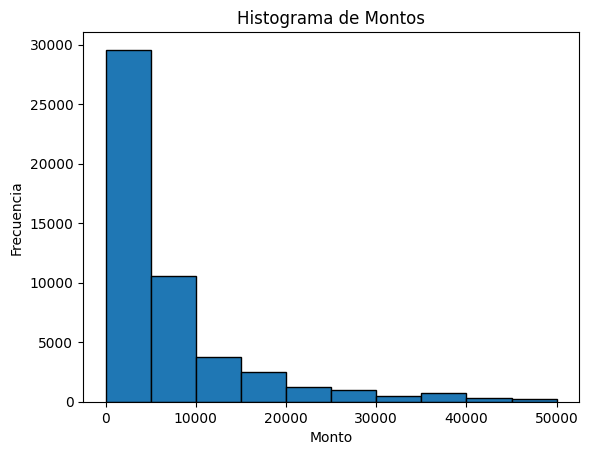

In [795]:
plt.hist(data=df, x='Import_Sollicitat',bins=10, edgecolor='black')

# Personalizar el histograma
plt.title('Histograma de Montos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [796]:
Q1 = df_import_solicitado_diferente_cero['Import_Sollicitat'].quantile(0.25)  # Primer cuartil (Q1)
Q2 = df_import_solicitado_diferente_cero['Import_Sollicitat'].quantile(0.50)  # Segundo cuartil (Q2) o mediana
Q3 = df_import_solicitado_diferente_cero['Import_Sollicitat'].quantile(0.75)  # Tercer cuartil (Q3)

In [797]:
IQ = Q3 -Q1
lim_sup = Q3 + 1.5*IQ
lim_inf = Q3 - 1.5*IQ

print(lim_sup)

print(lim_inf)

22450.0
-2450.0


In [798]:
len(df_import_solicitado_diferente_cero[df_import_solicitado_diferente_cero['Import_Sollicitat']>100])

50992

### Importe total del proyecto

In [799]:
df_subvencions['Import_Total_Projecte'].value_counts(normalize=True)*100

Import_Total_Projecte
0.00         6.307066
6000.00      1.774217
3000.00      1.331474
1000.00      1.133618
10000.00     0.930896
               ...   
240948.00    0.001622
226072.39    0.001622
68307.04     0.001622
5336.10      0.001622
8406.00      0.001622
Name: proportion, Length: 27180, dtype: float64

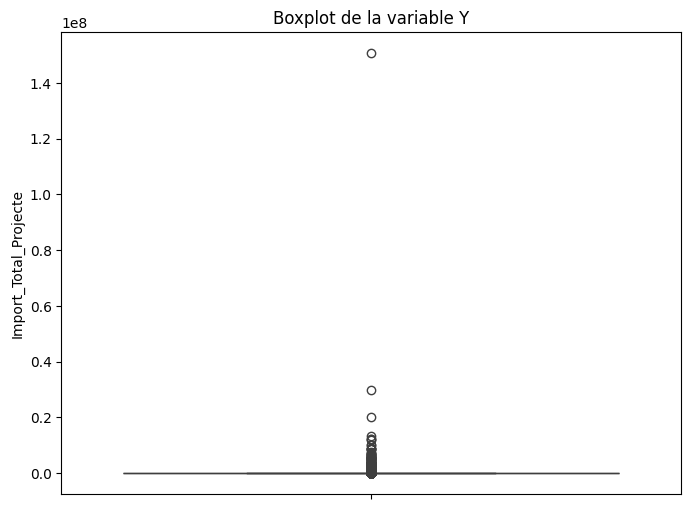

In [800]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subvencions, y='Import_Total_Projecte') 
plt.title('Boxplot de la variable Y')
plt.show()

In [801]:
print(len(df_subvencions[df_subvencions['Import_Total_Projecte']>50000]))
df = df_subvencions[df_subvencions['Import_Total_Projecte']<50000]

6447


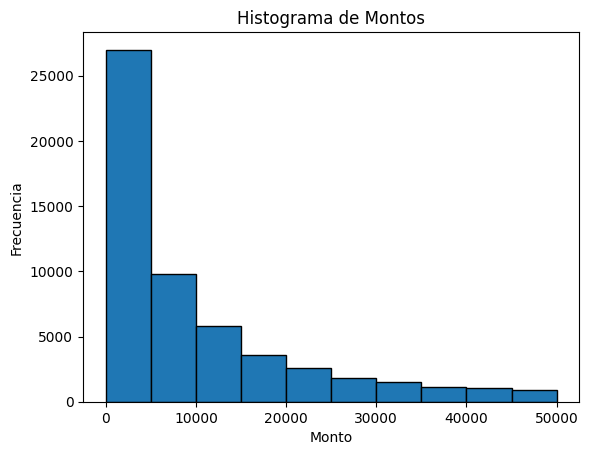

In [802]:
plt.hist(data=df, x='Import_Total_Projecte',bins=10, edgecolor='black')

# Personalizar el histograma
plt.title('Histograma de Montos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

###  Importe reintegrado

In [803]:
df_subvencions['Import_Reintegrat_Total'].value_counts()

Import_Reintegrat_Total
0.00       59744
1000.00      143
1500.00       85
500.00        78
2000.00       69
           ...  
2032.50        1
2123.57        1
249.57         1
2867.70        1
215.61         1
Name: count, Length: 1128, dtype: int64

In [804]:
print(len(df_subvencions[df_subvencions['Import_Reintegrat_Total']<1]))
print(len(df_subvencions[df_subvencions['Import_Reintegrat_Total']>=1]))

59748
1913


In [805]:
df_subvencions['Import_Reintegrat_Total'].min()

np.float64(0.0)

In [806]:
df = df_subvencions[df_subvencions['Import_Reintegrat_Total']!=0]

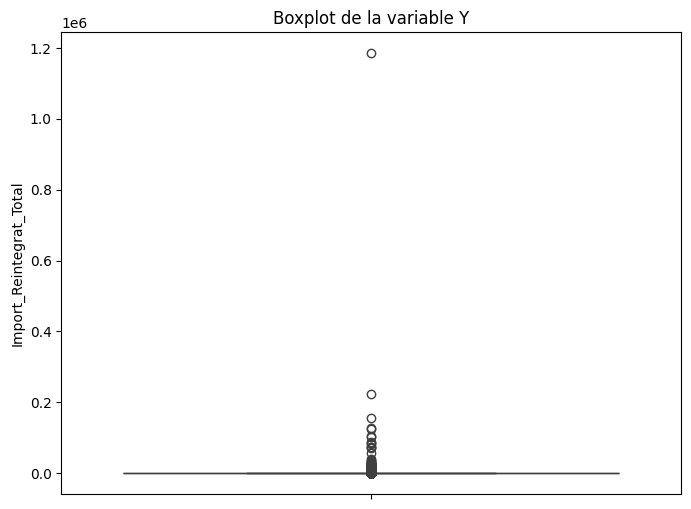

In [807]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_subvencions, y='Import_Reintegrat_Total') 
plt.title('Boxplot de la variable Y')
plt.show()

In [808]:
print(len(df_subvencions[df_subvencions['Import_Reintegrat_Total']>=50000]))
df = df_subvencions[(df_subvencions['Import_Reintegrat_Total']!=0)&(df_subvencions['Import_Reintegrat_Total']<50000)]

14


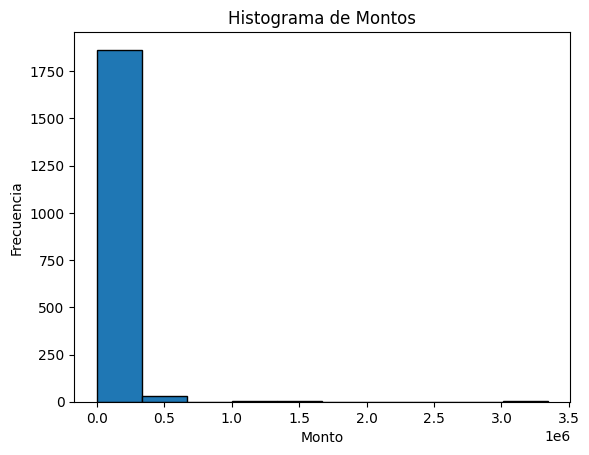

In [809]:
plt.hist(data=df, x='Import_Total_Projecte',bins=10, edgecolor='black')

# Personalizar el histograma
plt.title('Histograma de Montos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

## ANALISIS

In [810]:
df_subvencions.shape

(61661, 13)

In [811]:
df_subvencions.sample(1)

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
38402,Ajuntament de Barcelona,Gerència de Drets Socials,ASOC.ESPORTIVA CIUTAT VELLA DE BARC,G08941494,AJUTS,19S16895,Ajut del programa Promoció i participació infà...,00.00.0000,07.10.2019,19680.9,19680.9,19680.9,0.0


### Analizamos las fechas de convocatoria, fecha de otorgamiento y el código de subvención, la premisa es que la fecha de otorgamiento se da después de solicitarlo

In [812]:
df_subvencions

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
0,Ajuntament de Barcelona,"Gerència Drets de Ciutadania, Participació i T...",ASSOCIACIO UCRAINESA DJERELO,G65874968,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...,19S00465,V Ucrania Fest,24.01.2019,16.09.2019,5000.00,14900.00,4500.00,0.0
1,Ajuntament de Barcelona,Gerència de Drets Socials,PROJECTE DELS NOMS - HISPANOSIDA,G60396280,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. GERÈ...,19S00469,26è Memorial Internacional de la Sida,24.01.2019,12.09.2019,4000.00,13000.00,3000.00,0.0
2,Ajuntament de Barcelona,"Gerència Drets de Ciutadania, Participació i T...",ASSOCIACIÓ CULTURAL TUDANZAS,G66661653,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...,19S00470,Festival Social Tudanzas 2019,24.01.2019,04.10.2019,2000.00,31220.00,1000.00,0.0
3,Ajuntament de Barcelona,Gerència Ecologia Urbana,ASSOC PROMOCIÓ ADOPCIO I ACOLLIMENT,G66956624,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. ECOL...,19S00483,"ACOLLIDES,SOCIALITZACIÓ I PROMOCIÓ DELS ANIM",24.01.2019,09.07.2019,2000.00,5550.00,1950.00,0.0
4,Ajuntament de Barcelona,Gerència Ecologia Urbana,DEPANA LIGA PARA LA DEFENSADEL PATR,G58459280,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. ECOL...,19S00485,D'ON VENEN LES TORTUGUES?,24.01.2019,12.09.2019,3000.00,6000.00,980.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61691,Institut Municipal Barcelona Esports,Institut Municipal Barcelona Esports,CLUB NATACION BARCELONA,G08533689,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00988,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,25000.00,25000.00,25000.00,0.0
61692,Institut Municipal Barcelona Esports,Institut Municipal Barcelona Esports,REAL CLUB DE TENIS BARCELONA-1899,G08555278,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00989,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,25000.00,25000.00,25000.00,0.0
61693,Institut Municipal Barcelona Esports,Institut Municipal Barcelona Esports,Unió Esportiva d'Horta,G08675738,SUBVENCIONS DIRECTES (amb o sense CONVENI),20S00991,Convocatòria subv entitats esportives - COVID,00.00.0000,31.12.2020,18993.41,18993.41,18993.41,0.0
61694,Institut Municipal Barcelona Esports,Institut Municipal Barcelona Esports,Fed Esp Cat Paralítics Cerebrals,G60121043,SUBVENCIONS DIRECTES (amb o sense CONVENI),21S00311,Conveni DIBA 2020 - Esdeveniments,00.00.0000,06.05.2021,5000.00,5000.00,5000.00,0.0


In [813]:
df_subvencions[['Codi_De_Subvencio','Data_Convocatoria', 'Data_Atorgament']]

,Codi_De_Subvencio,Data_Convocatoria,Data_Atorgament
0,19S00465,24.01.2019,16.09.2019
1,19S00469,24.01.2019,12.09.2019
2,19S00470,24.01.2019,04.10.2019
3,19S00483,24.01.2019,09.07.2019
4,19S00485,24.01.2019,12.09.2019
...,...,...,...
61691,20S00988,00.00.0000,31.12.2020
61692,20S00989,00.00.0000,31.12.2020
61693,20S00991,00.00.0000,31.12.2020
61694,21S00311,00.00.0000,06.05.2021


In [814]:
print(df_subvencions.shape)
df_subvencions['Data_Convocatoria'] = pd.to_datetime(df_subvencions['Data_Convocatoria'], format='%d.%m.%Y', errors='coerce')
df_subvencions['Data_Atorgament'] = pd.to_datetime(df_subvencions['Data_Atorgament'], format='%d.%m.%Y', errors='coerce')

(61661, 13)


### Hay incoherencia en tener fechas negativas

In [815]:
df_subvencions['diferencia'] = df_subvencions['Data_Atorgament']-df_subvencions['Data_Convocatoria']

In [816]:
df_subvencions['diferencia'].describe() ## tenemos solo 33807 filas con  

count                          33807
mean     224 days 21:45:36.817818796
std       61 days 02:11:10.273472194
min              -122 days +00:00:00
25%                181 days 00:00:00
50%                231 days 00:00:00
75%                260 days 00:00:00
max                758 days 00:00:00
Name: diferencia, dtype: object

In [ ]:
print(len(df_subvencions[df_subvencions['diferencia']<'0 days'])) # tenemos 248 valores negativos, los eliminaré
#df_subvencions[df_subvencions['diferencia']<'0 days']


In [818]:
df_subvencions.drop(df_subvencions[df_subvencions['diferencia']<'0 days'].index, inplace=True)

In [819]:
df_subvencions.sample()

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total,diferencia
37103,Institut de Cultura de Barcelona,Institut de Cultura de Barcelona,AFAD ARTISTAS Y ARTESANOS DEL FOMEN,G60061710,CONVOCATÒRIA GENERAL DE SUBVENCIONS 2021. ICUB,21S00174,Tallers Oberts BCN,NaT,2021-09-22,22400.0,44800.0,18000.0,0.0,NaT


In [736]:
df_subvencions['diferencia'] = df_subvencions['diferencia'].dt.days

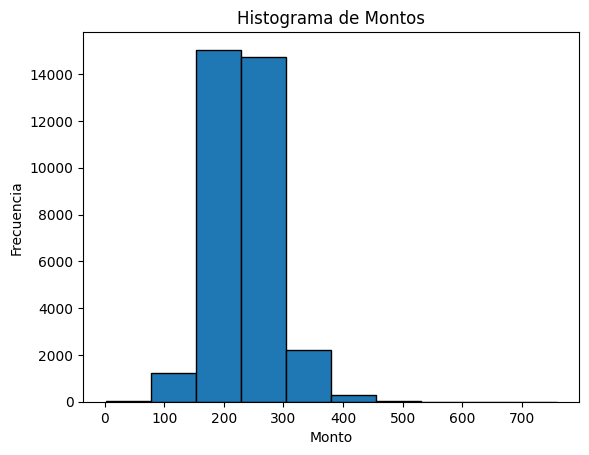

In [737]:
plt.hist(data=df_subvencions, x='diferencia', edgecolor='black')

# Personalizar el histograma
plt.title('Histograma de Montos')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [488]:
df_subvencions.sample()

,Entitat_Municipal,Organ_Gestor,Beneficiari,NIF_CIF,Tipologia_De_Subvencio,Codi_De_Subvencio,Objecte,Data_Convocatoria,Data_Atorgament,Import_Sollicitat,Import_Total_Projecte,Import_Atorgat_Inicial,Import_Reintegrat_Total
24548,Ajuntament de Barcelona,Gerència de Pressupostos i Hisenda,INST. MPAL. URBANISME,P5801910J,TRANSFERÈNCIES ENS PÚBLICS I ALTRES,21S14506,IMU interessos demora octubre 2021,00.00.0000,21.12.2021,0.0,0.0,3394.54,0.0


In [487]:
df_subvencions.groupby(['Entitat_Municipal'])['Organ_Gestor'].count()

Entitat_Municipal
Ajuntament de Barcelona                                       46185
Institut Barcelona Esports                                     1201
Institut Municipal Barcelona Esports                           3597
Institut Municipal d' Hisenda                                   236
Institut Municipal d'Educació                                   601
Institut Municipal d'Educació de Barcelona                      136
Institut Municipal de Mercats de Barcelona                      292
Institut Municipal de Persones amb Discapacitat                 508
Institut Municipal de Serveis Socials                           983
Institut Municipal de persones amb Discapacitat                1060
Institut Municipal del Paisatge Urbà i la Qualitat de Vida      386
Institut de Cultura de Barcelona                               6476
Name: Organ_Gestor, dtype: int64